<a href="https://colab.research.google.com/github/elazzaouisofiane/01DataMiningTest/blob/main/13Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [ ]:
import seaborn as sns

<Axes: xlabel='housing_median_age', ylabel='Count'>

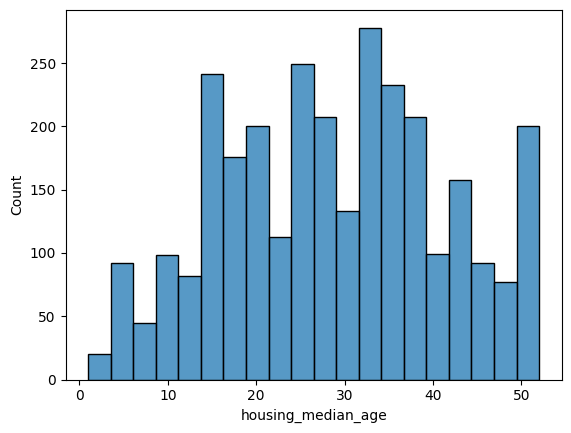

In [ ]:
sns.histplot(data=df, x='housing_median_age')

<Axes: xlabel='households', ylabel='Count'>

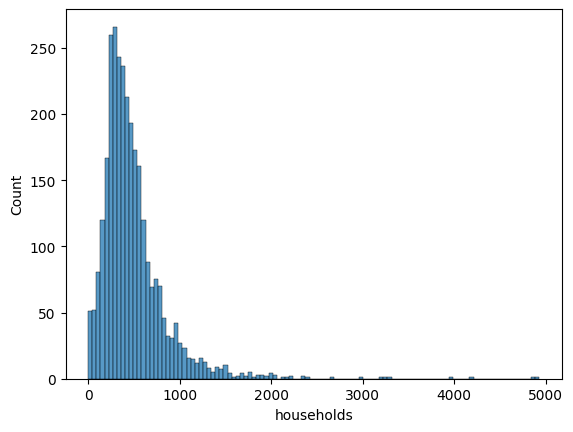

In [ ]:
sns.histplot(data=df, x='households')

<Axes: xlabel='housing_median_age'>

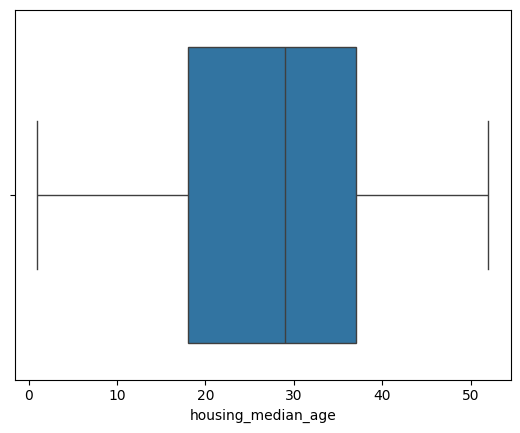

In [ ]:
sns.boxplot(data=df, x='housing_median_age')

<Axes: xlabel='households'>

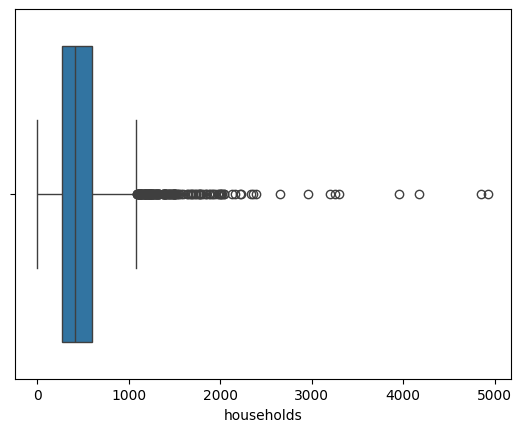

In [ ]:
sns.boxplot(data=df, x='households')

<Axes: xlabel='total_rooms', ylabel='population'>

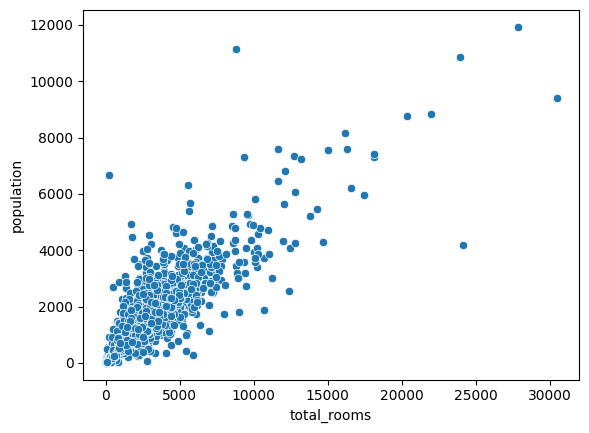

In [ ]:
sns.scatterplot(data=df, x='total_rooms', y='population')

<Axes: xlabel='latitude', ylabel='median_income'>

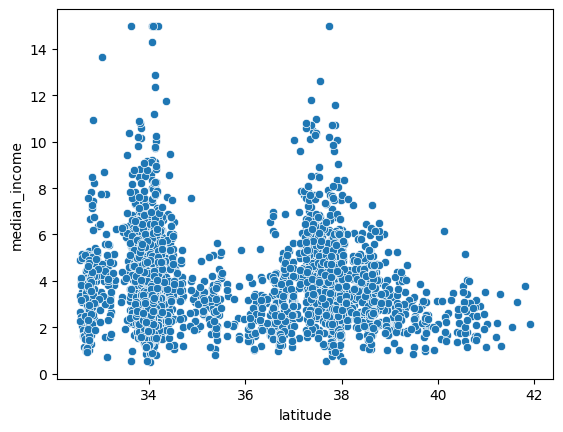

In [ ]:
sns.scatterplot(data=df, x='latitude', y='median_income')

In [ ]:
df=df[['total_bedrooms','households']]
df.head()

,total_bedrooms,households
0,661.0,606.0
1,310.0,277.0
2,507.0,495.0
3,15.0,11.0
4,244.0,237.0


In [ ]:
df['ave_bedrooms']=df['total_bedrooms']/df['households']
import scipy.stats as stats
df['zscore']=stats.zscore(df['ave_bedrooms'])
df.head()

,total_bedrooms,households,ave_bedrooms,zscore
0,661.0,606.0,1.090759,-0.017288
1,310.0,277.0,1.119134,0.048812
2,507.0,495.0,1.024242,-0.172242
3,15.0,11.0,1.363636,0.618393
4,244.0,237.0,1.029536,-0.159911


In [ ]:
outliers = df[(df.zscore < -3) | (df.zscore > 3)]
len(outliers)

25

In [ ]:
outliers

,total_bedrooms,households,ave_bedrooms,zscore
209,1636.0,568.0,2.880282,4.151496
244,363.0,127.0,2.858268,4.100213
413,1278.0,112.0,11.410714,24.023574
655,666.0,136.0,4.897059,8.849681
664,203.0,84.0,2.416667,3.071481
881,386.0,116.0,3.327586,5.193515
926,1432.0,540.0,2.651852,3.619357
1094,178.0,21.0,8.476190,17.187451
1188,989.0,376.0,2.630319,3.569196
1408,59.0,23.0,2.565217,3.417538


In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df = df[['housing_median_age', 'median_house_value']]
df.head(100)

,housing_median_age,median_house_value
0,27.0,344700.0
1,43.0,176500.0
2,27.0,270500.0
3,28.0,330000.0
4,19.0,81700.0
...,...,...
95,30.0,96000.0
96,20.0,90600.0
97,16.0,121900.0
98,20.0,209400.0


<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

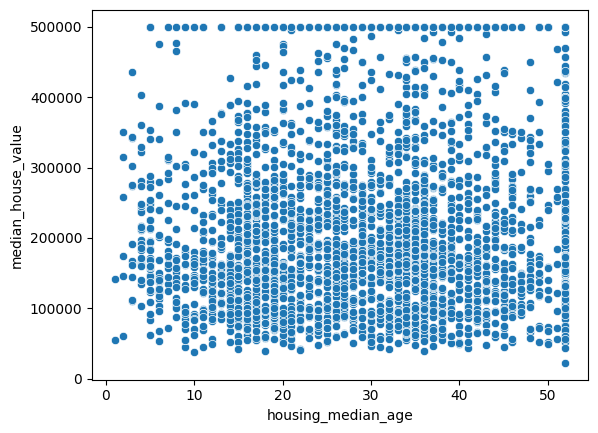

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x='housing_median_age', y='median_house_value')


In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=5)
knn.fit(df)


NearestNeighbors()

In [ ]:
dist,ind = knn.kneighbors()
import numpy as np
mean_knn_distance = np.mean(dist,1)

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

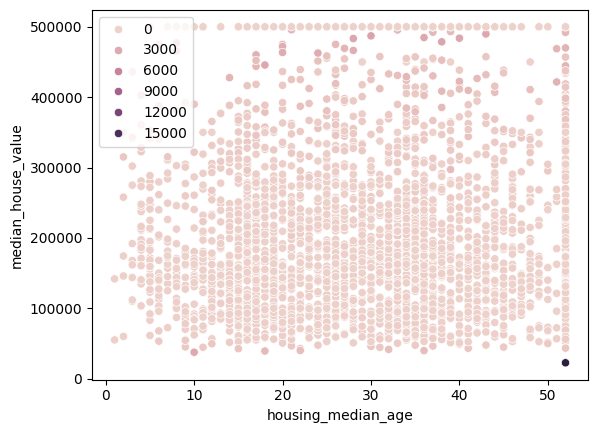

In [ ]:
sns.scatterplot(x=df['housing_median_age'],
                y=df['median_house_value'],
                hue=mean_knn_distance)